### Assignment 2
#### Akash Shivaji Varude (231110006)

### Task1

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression

#collected data
distances = np.array([1, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13])
RSSI = np.array([-46, -47, -52 , -55, -57, -59, -61, -66, -68, -71, -72])

#as we want log10 of distances, hence converting distance into log10(distance) 
Log_Distances = np.array([math.log10(distance) for distance in distances])

In [2]:
Log_Distances=Log_Distances.reshape(-1, 1) 
model=LinearRegression().fit(Log_Distances,RSSI)  #Finding best fit line


In [3]:
RSSI_predicted = model.predict(Log_Distances)
slope=model.coef_
intercpt=model.intercept_

#Finding Path Loss Exponent
path_loss_exponent=abs(slope/10)

#Calculating Variance of samples w.r.t best fit line
residuals = RSSI - RSSI_predicted
variance = np.var(residuals)
print("Path Loss Exponent:", path_loss_exponent)
print("Variance of scattered samples with respect to the best-fit line:", variance)

Path Loss Exponent: [2.4204511]
Variance of scattered samples with respect to the best-fit line: 7.9097947045859875


Text(0, 0.5, 'RSSI value')

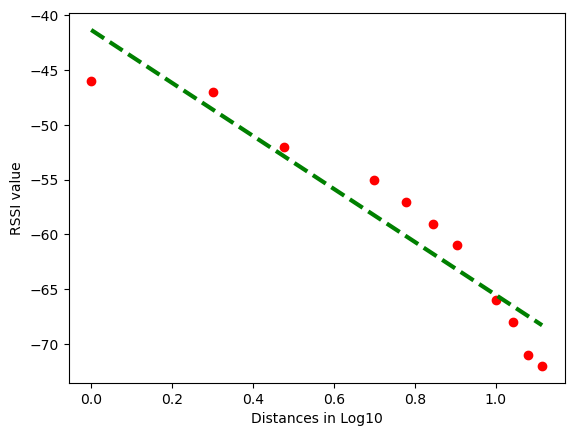

In [35]:
plt.scatter(Log_Distances, RSSI, color='red')
plt.plot(Log_Distances, RSSI_predicted,color='green',linestyle='--', linewidth=3)
plt.xlabel("Distances in Log10")
plt.ylabel("RSSI value")


### Task 2

If distance d0=1 meter then log10(1)=0. Hence  𝑃𝑟[𝑑0]𝑑B is value of RSSI in our best fitting line at log10(1) i.e. at 0. Which is just an intercept of our best fitting line. Also I have used numpy array of size 5 to calculate their distances.

In [36]:
RSSI_0 = intercpt  # RSSI at 1 meter from best fitting line

New_RSSI=np.array([-63,-56,-60,-71,-55])     #As we want to measure distance of 5 RSSI values
Actual_Distances=np.array([8,5,6,15,4])
# Calculate estimated distances for each RSSI value
estimated_distances = 10**((RSSI_0 - New_RSSI) / (10 * path_loss_exponent))

print("Actual Distances (meters):", Actual_Distances)
print("Estimated Distances (meters):", estimated_distances)


Actual Distances (meters): [ 8  5  6 15  4]
Estimated Distances (meters): [ 7.85934143  4.03816319  5.90802491 16.82298505  3.67171745]


In [37]:
distance_error = np.abs(estimated_distances - Actual_Distances)
average_error = np.mean(distance_error)

print("Distance Errors (meters):", distance_error)
print("Average Error of 5 distances (meters):", average_error)

Distance Errors (meters): [0.14065857 0.96183681 0.09197509 1.82298505 0.32828255]
Average Error of 5 distances (meters): 0.6691476148208881
